In [1]:
from pandas import read_excel
import datetime as dt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

복사해서 사용할 것 불러오는데 오래걸림
데이터설명
http://itpaper.co.kr/data/koweps2021_codebook.xlsx



In [181]:
koweps = read_excel('http://itpaper.co.kr/data/koweps2021_dataset.xlsx', engine='openpyxl')
koweps

,h01_4,h01_5,h01_6,h01_110,h01_11,h03_7aq1,h03_8,h07_5aq3,h17_1,h_hc
0,2,1936,2,1,2,9,NaN,5.0,0,2
1,2,1936,2,1,2,9,NaN,2.0,0,2
2,2,1936,2,1,2,9,NaN,3.0,4,2
3,2,1936,2,1,2,9,NaN,1.0,7,1
4,2,1936,2,1,2,9,NaN,1.0,7,2
...,...,...,...,...,...,...,...,...,...,...
98881,1,1967,5,5,1,9,874.0,114.0,4,1
98882,1,1967,5,5,1,9,874.0,105.0,0,1
98883,1,1967,5,5,1,9,874.0,120.0,0,1
98884,1,1967,5,5,1,9,874.0,115.0,0,1


In [182]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)


## 문제1)

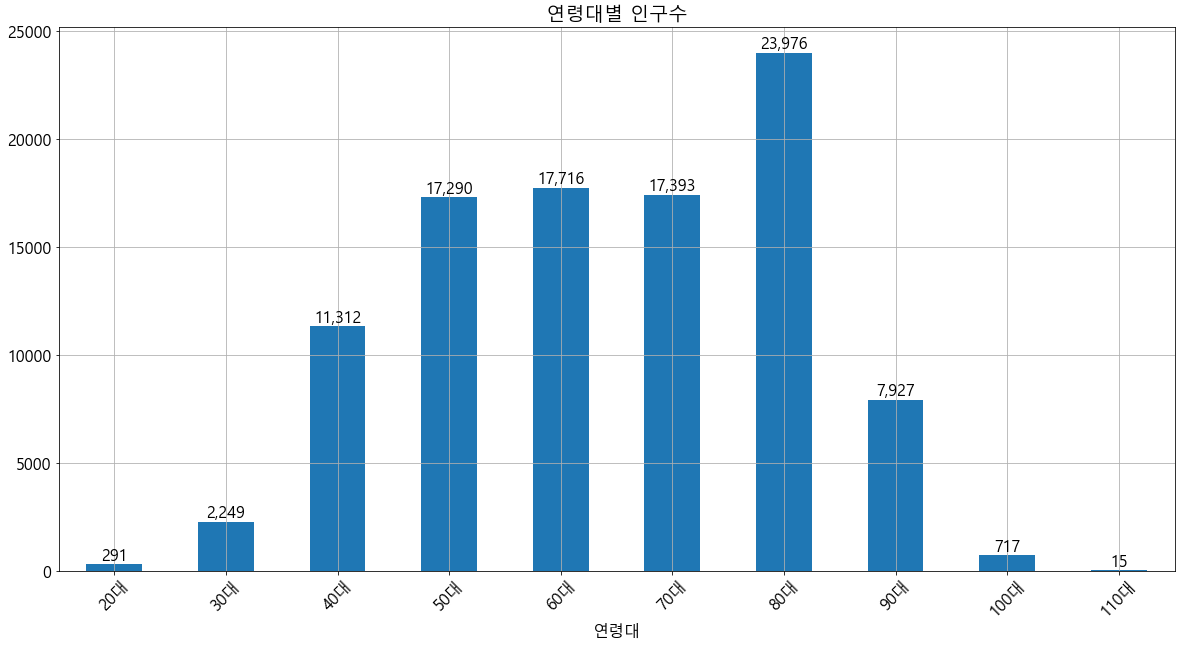

In [199]:
df = koweps.copy()

rename_df = df.rename(columns = {'h01_4' : '성별', 'h01_5' : '태어난 년도', 'h01_6' : '교육수준', 'h01_110' : '가구형태', 'h01_11' : '혼인상태', 'h03_7aq1' : '경제활동 참여상태', 'h03_8' : '직종', 'h07_5aq3' : '통신비' , 'h17_1' : '1년간 근심이나 갈등을 초래한 문제' , 'h_hc' : '균등화_소득에_따른_가구_구분'})

year = dt.datetime.now().year

labels = []

rename_df['연령대'] = ((year-rename_df['태어난 년도'] +1) // 10)


rename_df
group_df = rename_df['연령대'].value_counts().sort_index()

for i in group_df.index:
    labels.append('%d' % i + '0대')

group_df.plot.bar(rot = 45)
plt.xticks(range(0, len(group_df.index)),labels )
plt.grid()
plt.xlabel('연령대')
plt.title('연령대별 인구수')

for i,v in enumerate(group_df.values):
    txt = format(v, ',')
    plt.text(i,v,txt, horizontalalignment = 'center', verticalalignment = 'bottom')

## 문제2)

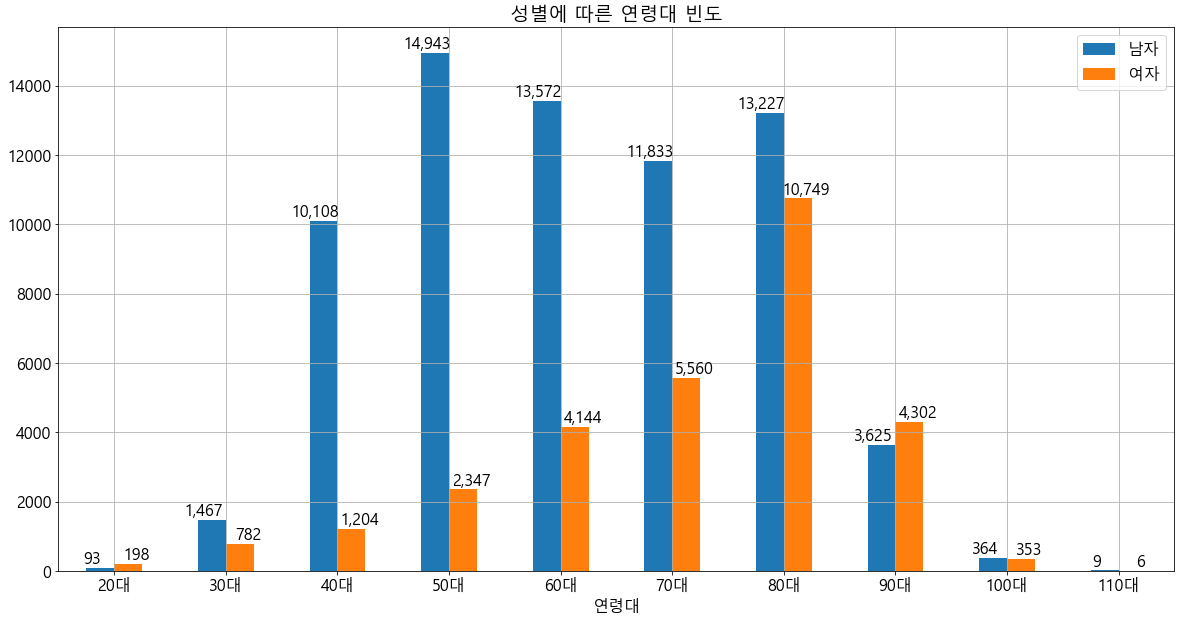

In [184]:
from sklearn.impute import SimpleImputer

정제규칙 = SimpleImputer(missing_values =np.nan, strategy='constant', fill_value=0)

multi_group_df = rename_df.groupby(['연령대', '성별']).count()

multi_group_df = multi_group_df.unstack()

multi_group_df['태어난 년도'] = 정제규칙.fit_transform(multi_group_df['태어난 년도'].values)
multi_group_df['태어난 년도'].plot.bar(rot = 0)

plt.xticks(range(0, len(multi_group_df.index)),labels )
plt.legend(labels = ['남자', '여자'])
plt.grid()
plt.title('성별에 따른 연령대 빈도')

for i,v in enumerate(multi_group_df['태어난 년도'].values):
    for j, item in enumerate(v):
        txt = format(item, ',')
        
        if j == 0:
            plt.text(i-0.2,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        else:
            plt.text(i+0.2,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')


## 문제3)

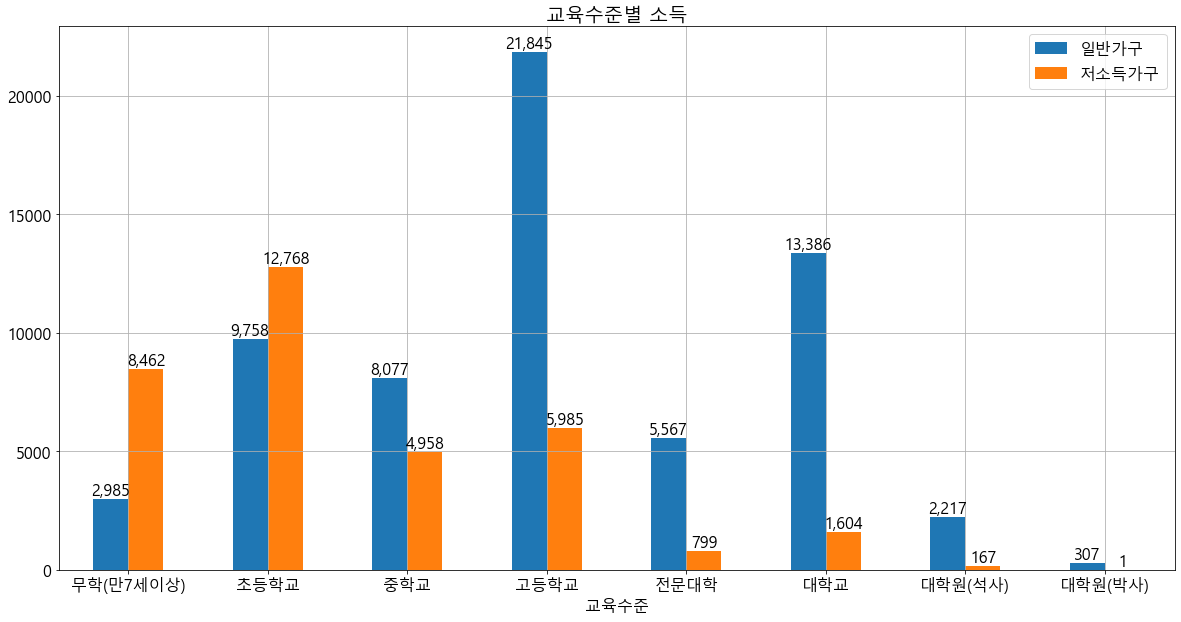

In [227]:
cross_tab = pd.crosstab(rename_df['교육수준'],rename_df['균등화_소득에_따른_가구_구분'])
cross_tab.plot.bar(rot = 0)
plt.legend(labels=['일반가구', '저소득가구'])
plt.grid()
plt.title('교육수준별 소득')
plt.xlabel('교육수준')

xpos = np.arange(0,len(cross_tab.index))
xlabels = ['무학(만7세이상)','초등학교','중학교','고등학교','전문대학','대학교','대학원(석사)','대학원(박사)']

plt.xticks(xpos,xlabels)

for i,v in enumerate(cross_tab.values):
    for j, item in enumerate(v):
        txt = format(item, ',')
        
        if j == 0:
            plt.text(i-0.13,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        else:
            plt.text(i+0.13,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')


## 문제4)

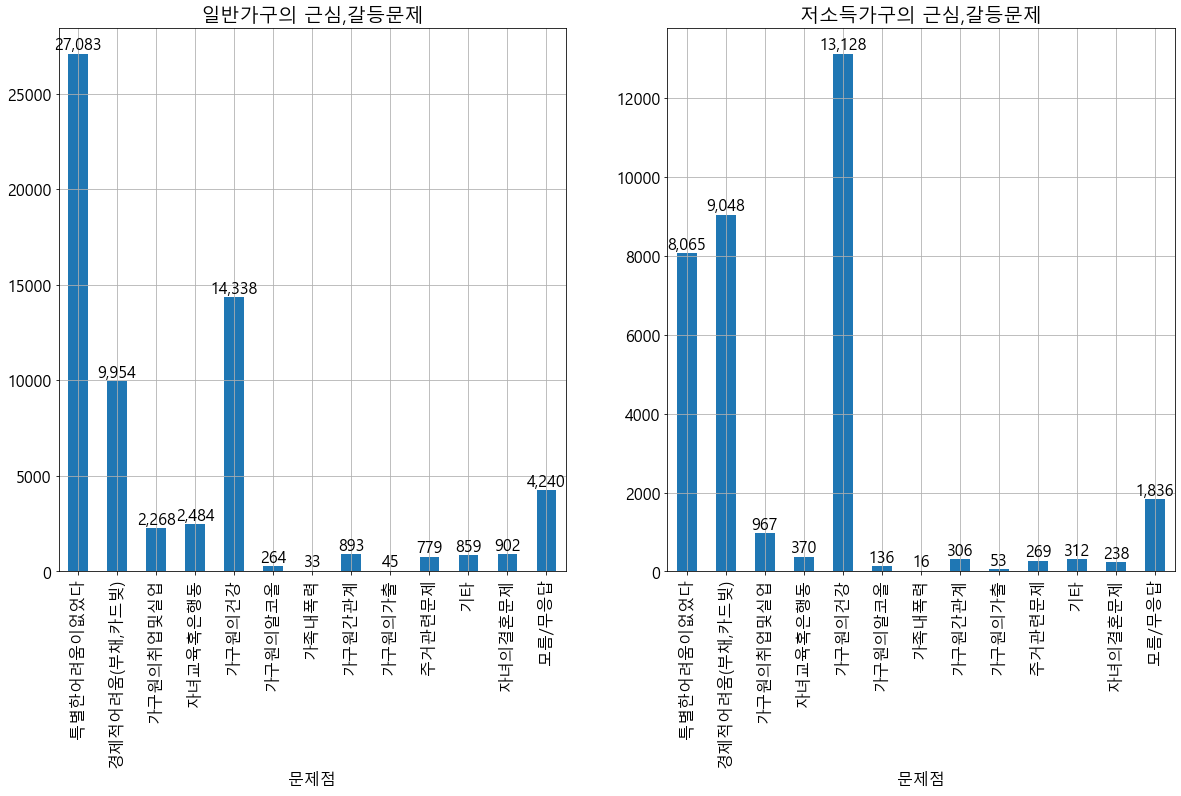

In [187]:
normal_df = rename_df.query("균등화_소득에_따른_가구_구분 == 1.0")
poor_df = rename_df.query("균등화_소득에_따른_가구_구분 == 2.0")

normal = normal_df['1년간 근심이나 갈등을 초래한 문제'].value_counts().sort_index()
poor = poor_df['1년간 근심이나 갈등을 초래한 문제'].value_counts().sort_index()

fig, ax = plt.subplots(1,2)

normal.plot.bar(ax = ax[0])
ax[0].grid()
ax[0].set_title('일반가구의 근심,갈등문제')
ax[0].set_xlabel('문제점')

poor.plot.bar(ax = ax[1])
ax[1].grid()
ax[1].set_title('저소득가구의 근심,갈등문제')
ax[1].set_xlabel('문제점')

xpos = np.arange(0,len(normal))
xlabels = ['특별한어려움이없었다','경제적어려움(부채,카드빚)','가구원의취업및실업','자녀교육혹은행동','가구원의건강','가구원의알코올','가족내폭력','가구원간관계','가구원의가출','주거관련문제','기타','자녀의결혼문제','모름/무응답']

ax[0].set_xticks(xpos)
ax[0].set_xticklabels(xlabels)
ax[1].set_xticks(xpos)
ax[1].set_xticklabels(xlabels)

for i,v in enumerate(normal):
    txt = format(v, ',')
    ax[0].text(i,v,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
    
for i,v in enumerate(poor):
    txt = format(v, ',')
    ax[1].text(i,v,txt, horizontalalignment = 'center', verticalalignment = 'bottom')

## 문제5)

In [209]:
rename_df['연령대']
for i , item in enumerate(rename_df['연령대'].values):

    if item in [0, 1, 2]:
        rename_df['연령대'][i] ='청년층'
    elif item in [3, 4, 5]:
        rename_df['연령대'][i] = '중년층'
    else:
        rename_df['연령대'][i] = '노년층'

<ipython-input-209-2bdc93a203e2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rename_df['연령대'][i] = '노년층'
<ipython-input-209-2bdc93a203e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rename_df['연령대'][i] = '중년층'
<ipython-input-209-2bdc93a203e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rename_df['연령대'][i] ='청년층'


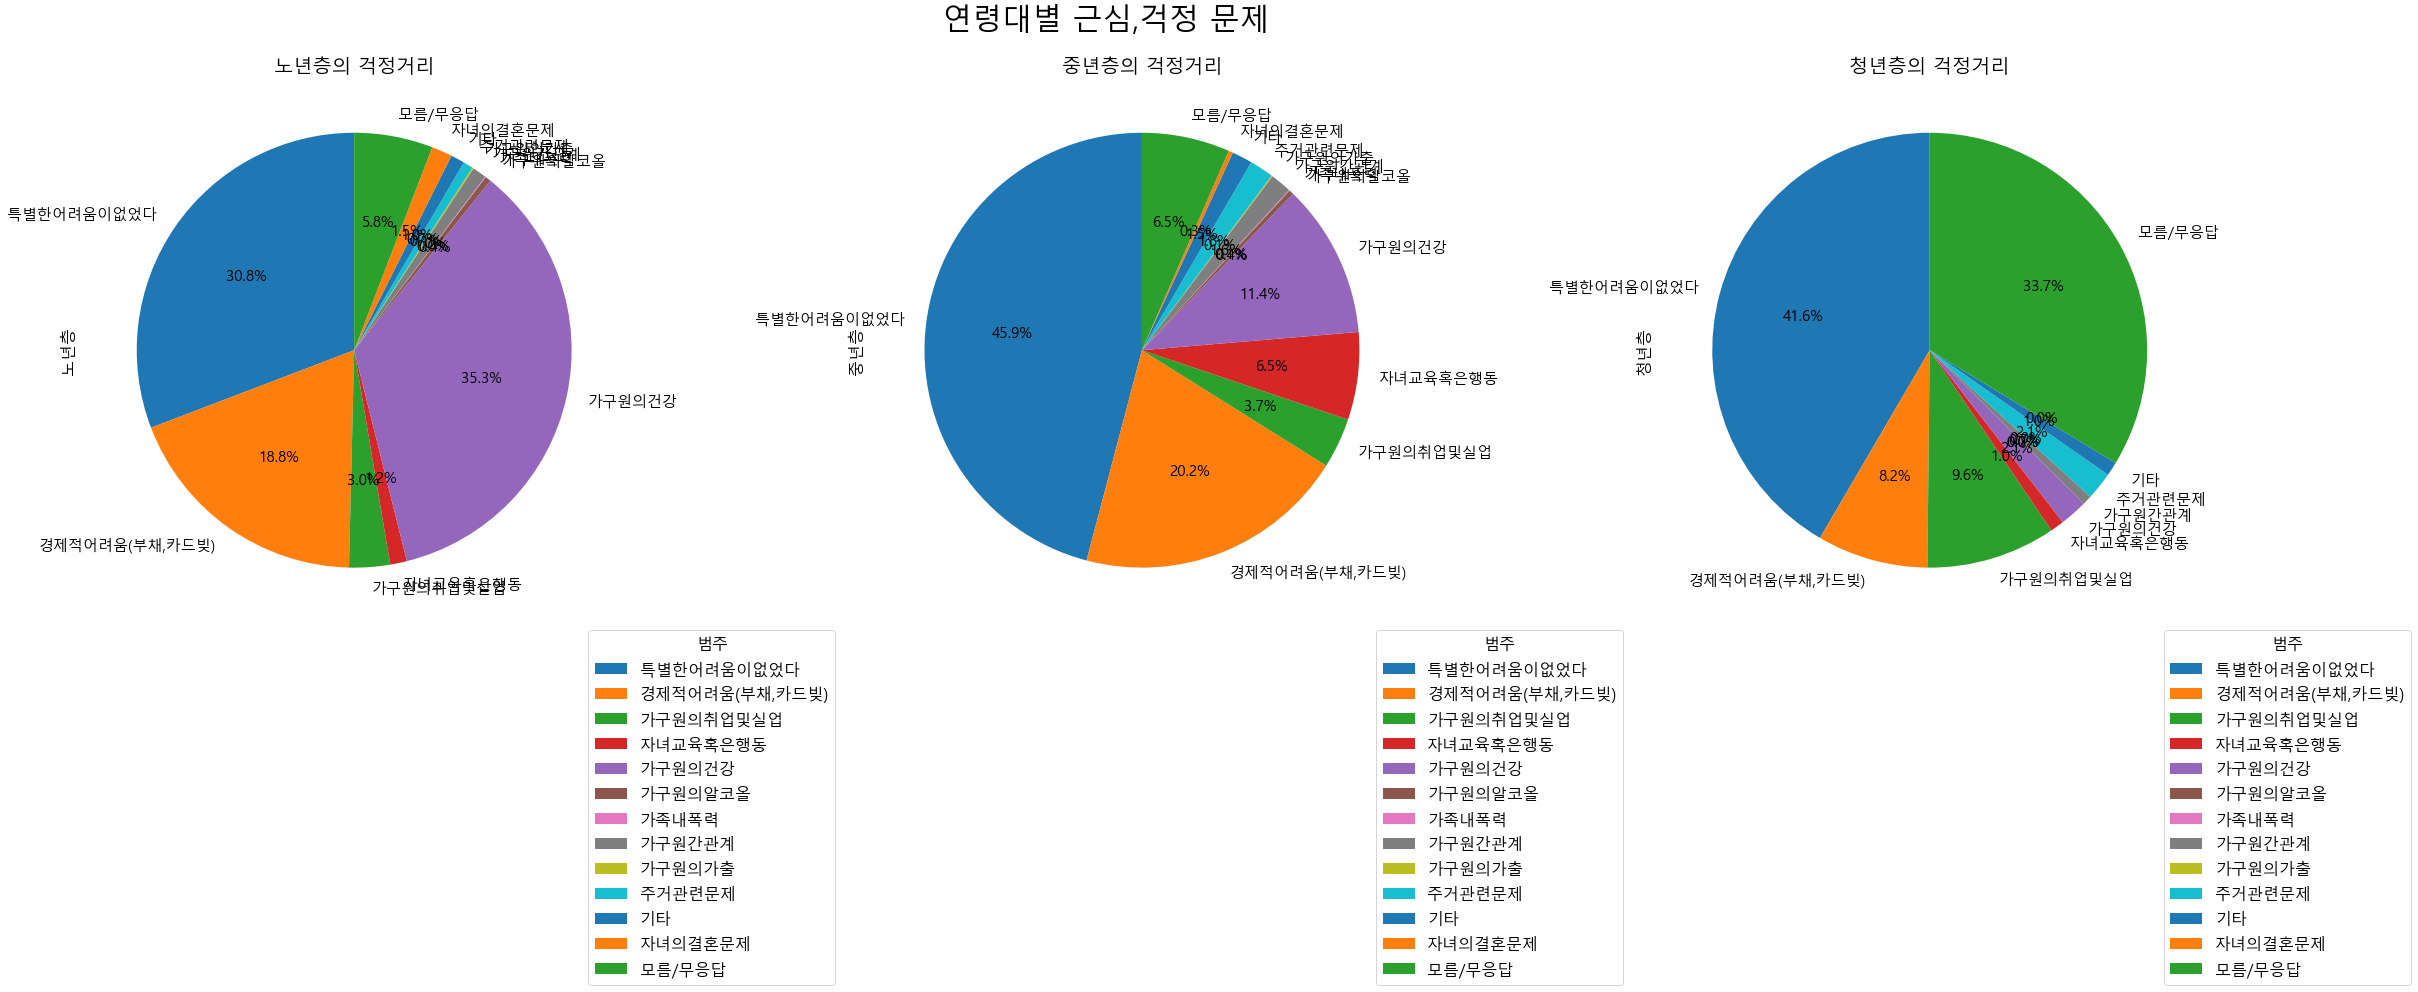

In [226]:
cross_tab = pd.crosstab(rename_df['연령대'],rename_df['1년간 근심이나 갈등을 초래한 문제'])

fig, ax = plt.subplots(1,3, figsize = (40,10))

plt.suptitle('연령대별 근심,걱정 문제', fontsize = 30)

xpos = np.arange(0, len(cross_tab.columns))
xlabels = ['특별한어려움이없었다','경제적어려움(부채,카드빚)','가구원의취업및실업','자녀교육혹은행동','가구원의건강','가구원의알코올','가족내폭력','가구원간관계','가구원의가출','주거관련문제','기타','자녀의결혼문제','모름/무응답']

for i,v in enumerate(cross_tab.index):
    cross_tab.loc[v].plot.pie(ax = ax[i],labels = xlabels,startangle = 90, autopct='%0.1f%%',textprops={'color': '#000000','fontsize': 15})
    ax[i].grid()
    ax[i].set_title('%s의 걱정거리' %v)

    ax[i].legend(labels=xlabels, title = '범주', bbox_to_anchor=(1.4,0))


## 문제6)

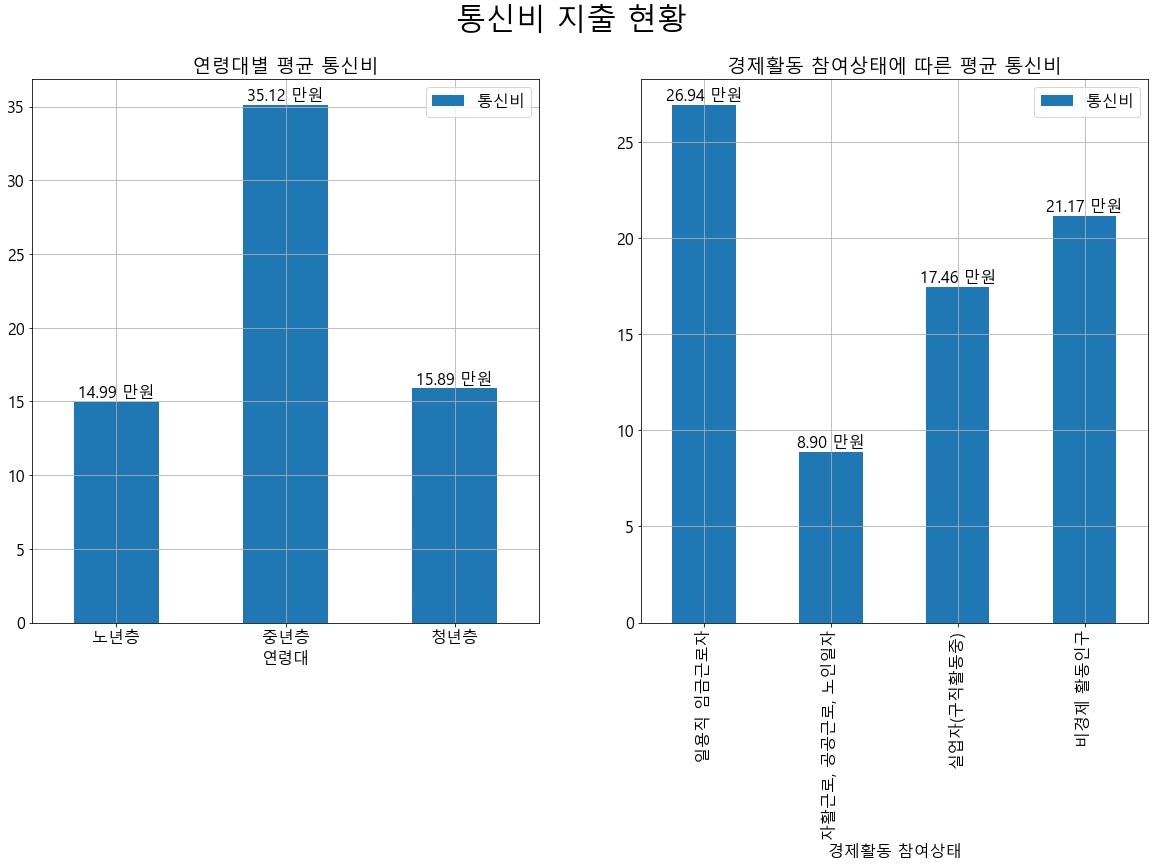

In [212]:
fig, ax = plt.subplots(1,2)

plt.suptitle('통신비 지출 현황', fontsize = 30)

통신비df = rename_df.groupby('연령대')['통신비'].mean()
통신비df = pd.DataFrame(통신비df)
통신비df.plot.bar(ax = ax[0], rot = 0)
ax[0].set_title('연령대별 평균 통신비')
ax[0].grid()


for i,v in enumerate(통신비df.values):
        txt = '%0.2f 만원' %v
        ax[0].text(i,v,txt, horizontalalignment = 'center', verticalalignment = 'bottom')

#--------------------------------------------------------------------------------------------------

경제활동참여df = rename_df.groupby('경제활동 참여상태')['통신비'].mean()
경제활동참여df = pd.DataFrame(경제활동참여df)
경제활동참여df.plot.bar(ax = ax[1])
ax[1].set_title('경제활동 참여상태에 따른 평균 통신비')
ax[1].grid()

xpos = np.arange(0, len(경제활동참여df.index))
xlabels_all = ['상용직 임금근로자','임시직 임금근로자','일용직 임금근로자','자활근로, 공공근로, 노인일자','고용주','자영업자','무급가족종사자','실업자(구직활동중)','비경제 활동인구']

xlabels = []
xidx = 0

for i,v in enumerate(xlabels_all):
    if i == 경제활동참여df.index[xidx] - 1:
        xlabels.append(v)
        xidx += 1

ax[1].set_xticks(xpos)
ax[1].set_xticklabels(xlabels)
    
for i,v in enumerate(경제활동참여df.values):
        txt = '%0.2f 만원' %v
        ax[1].text(i,v,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        


## 문제7)

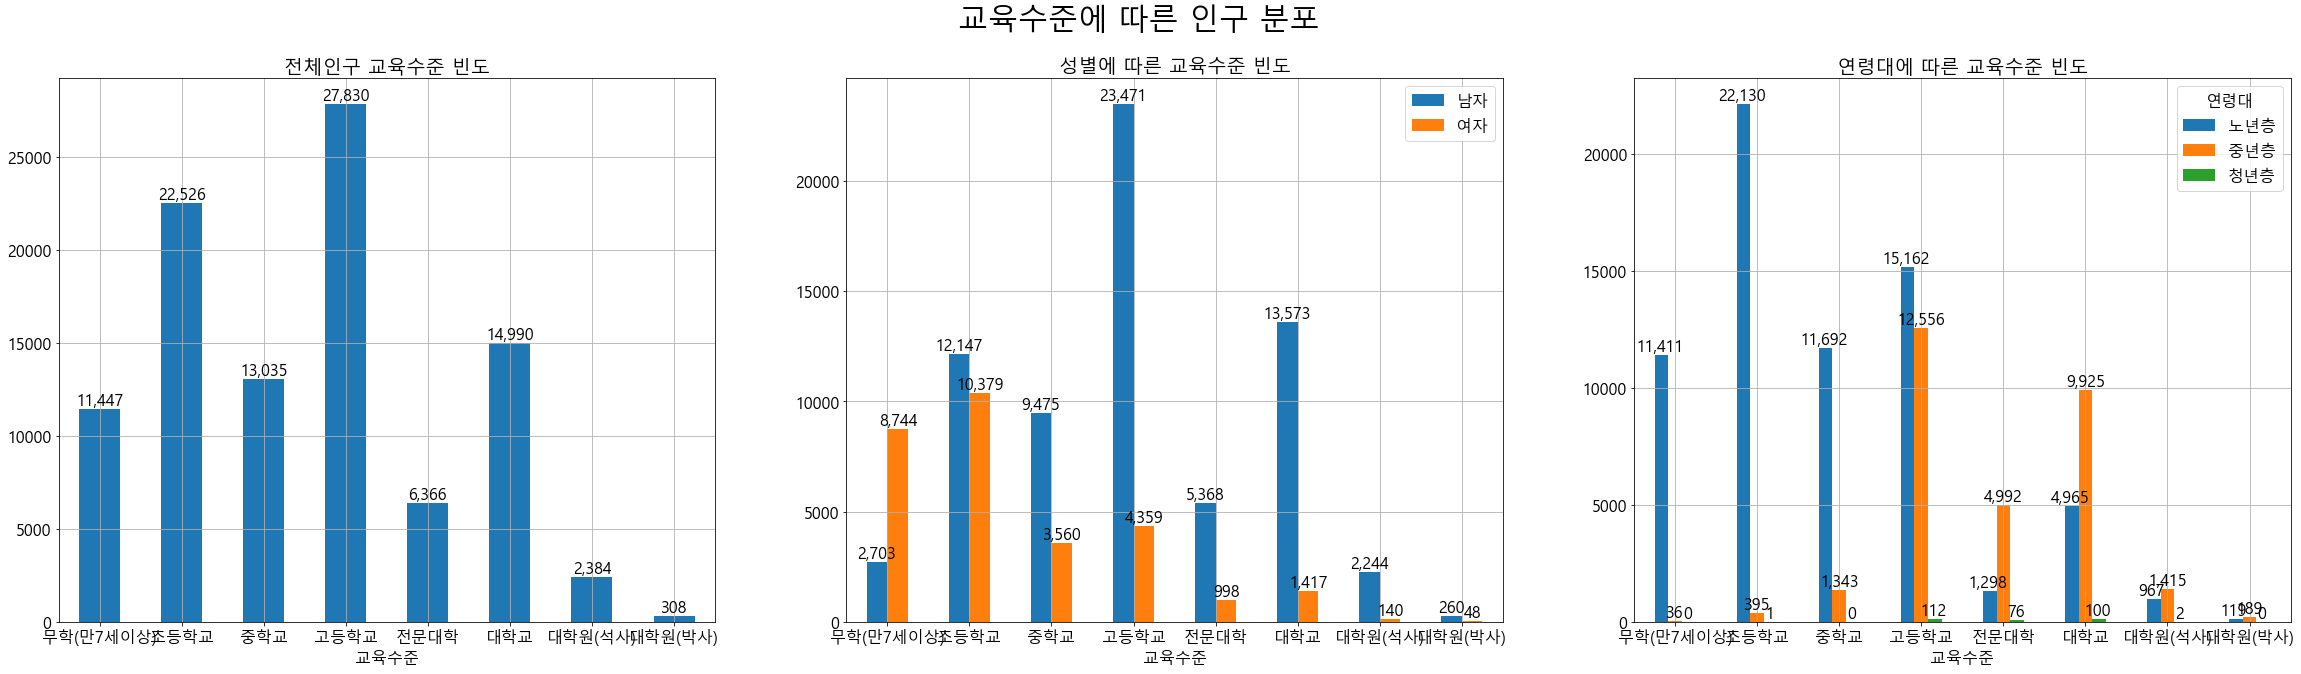

In [214]:
fig, ax = plt.subplots(1,3,figsize = (40,10))

plt.suptitle('교육수준에 따른 인구 분포', fontsize = 30)

교육수준 = rename_df['교육수준'].value_counts().sort_index()
교육수준.plot.bar(ax = ax[0],rot = 0)
xpos = np.arange(0,len(교육수준))
xlabels = ['무학(만7세이상)','초등학교','중학교','고등학교','전문대학','대학교','대학원(석사)','대학원(박사)']

ax[0].grid()
ax[0].set_xticks(xpos)
ax[0].set_xticklabels(xlabels)
ax[0].set_xlabel('교육수준')
ax[0].set_title('전체인구 교육수준 빈도')

for j,w in enumerate(교육수준.values):
        txt = format(w, ',')
        ax[0].text(j,w,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
#------------------------------------------------------------------------------------------------------------------------
ct_1 = pd.crosstab(rename_df['성별'],rename_df['교육수준']).T
ct_1.plot.bar(ax = ax[1],rot = 0)
ax[1].set_xticks(xpos)
ax[1].set_xticklabels(xlabels)
ax[1].grid()
ax[1].legend(labels = ['남자', '여자'])
ax[1].set_title('성별에 따른 교육수준 빈도')

for i,v in enumerate(ct_1.values):
    for j, item in enumerate(v):
        txt = format(item, ',')
        
        if j == 0:
            ax[1].text(i-0.13,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        else:
            ax[1].text(i+0.13,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
            
#------------------------------------------------------------------------------------------------------------------------
ct_2 = pd.crosstab(rename_df['연령대'],rename_df['교육수준']).T
ct_2.plot.bar(ax = ax[2], rot = 0)
ax[2].set_xticks(xpos)
ax[2].set_xticklabels(xlabels)
ax[2].grid()
ax[2].set_title('연령대에 따른 교육수준 빈도')

for i,v in enumerate(ct_2.values):
    for j, item in enumerate(v):
        txt = format(item, ',')
        
        if j == 0:
            ax[2].text(i-0.19,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        elif j == 1:
            ax[2].text(i,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        else:
            ax[2].text(i+0.15,item,txt, horizontalalignment = 'center', verticalalignment = 'bottom') 

